<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/Clase1_Prof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $$ y^{\prime} = y - t^2 + 1, 0\leq t \leq 2, \quad y(0) = 0.5 $$

# Solución exacta:
# $$ y(t) = (t  + 1)^2 - 0.5\,e^t$$

Tamaño de paso, h = 0.2


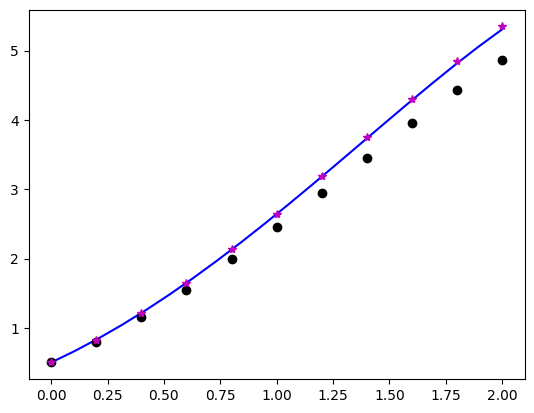

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Implementación método de Euler Explícito

def f(t,y):
    fty = y - t**2 + 1
    return fty

def dft(t,y):
    dfty = -2*t + y - t**2 + 1
    return dfty

a = 0
b = 2
N = 10

h = (b - a)/N

print(f'Tamaño de paso, h = {h}')

t0 = a
w0 = 0.5
ty = np.zeros((N+1,2))
MTaylor = np.zeros((N+1,2))

ty[0,0] = MTaylor[0,0] = t0
ty[0,1] = MTaylor[0,1] = w0

for i in range(0,N):
    ty[i+1,1] = ty[i,1] + h*f(t0,ty[i,1])
    MTaylor[i+1,1] = MTaylor[i,1] + h*f(t0,MTaylor[i,1]) + h**2*dft(t0,MTaylor[i,1])/2
    t0 = t0 + h
    ty[i+1,0] = MTaylor[i+1,0] = t0

# Solución exacta
t = np.linspace(a,b,20)
yt = (t + 1)**2 - 0.5*np.exp(t)

plt.plot(t,yt,'b')
plt.plot(ty[:,0],ty[:,1],'ok')
plt.plot(MTaylor[:,0],MTaylor[:,1],'*m')
plt.show()

Tamaño de paso, h = 0.04


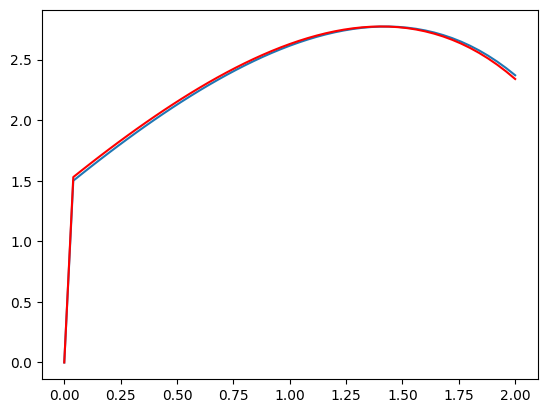

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Implementación método de Euler Explícito

def y(t):
    yt = (t + 1)**2 - 0.5*np.exp(t)
    return yt

def f(t,y):
    fty = y - t**2 + 1
    return fty

def dft(t,y):
    dfty = -2*t + y - t**2 + 1
    return dfty

a = 0
b = 2
N = 50

h = (b - a)/N

print(f'Tamaño de paso, h = {h}')

t0 = a
w0 = 0.5
ty = np.zeros((N+1,2))
MTaylor = np.zeros((N+1,2))
EMEuE = np.zeros((N+1,2))
EMTaylor = np.zeros((N+1,2))
ty[0,0] = MTaylor[0,0] = t0
EMEuE[0,0]  = t0
ty[0,1] = MTaylor[0,1] = w0

EMEuE[0,1] = 0

for i in range(0,N):
    ty[i,1] = MTaylor[i,1]  = y(t0)

    ty[i+1,1] = ty[i,1] + h*f(t0,ty[i,1])
    MTaylor[i+1,1] = MTaylor[i,1] + h*f(t0,MTaylor[i,1]) + h**2*dft(t0,MTaylor[i,1])/2

    EMEuE[i+1,1] = (np.abs(y(t0) - ty[i+1,1]))/h
    EMTaylor[i+1,1] = np.abs(y(t0) - MTaylor[i+1,1])/h

    t0 = t0 + h
#    print(f't0 = {t0}\n')
    ty[i+1,0] = t0 #MTaylor[i+1,0] = t0
    EMEuE[i+1,0] = t0
    EMTaylor[i+1,0] = t0
# Grafica de Error de truncamiento local

plt.plot(EMEuE[:,0],EMEuE[:,1])
plt.plot(EMTaylor[:,0],EMTaylor[:,1],'r')
plt.show()